<a href="https://colab.research.google.com/github/Gauravgade3/Heart-Disease-Prediction/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/heart.csv')

In [ ]:
df.shape

(918, 12)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.Oldpeak.value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

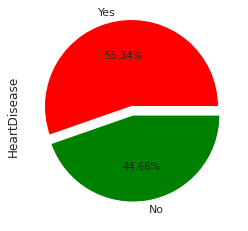

In [ ]:
df.HeartDisease.value_counts().plot(kind='pie',explode=[0.1,0],autopct='%.2f%%',labels=['Yes','No'],colors=['red','green'])
plt.rcParams['figure.figsize']=(9,9)

HeartDisease
0    50.551220
1    55.899606
Name: Age, dtype: float64


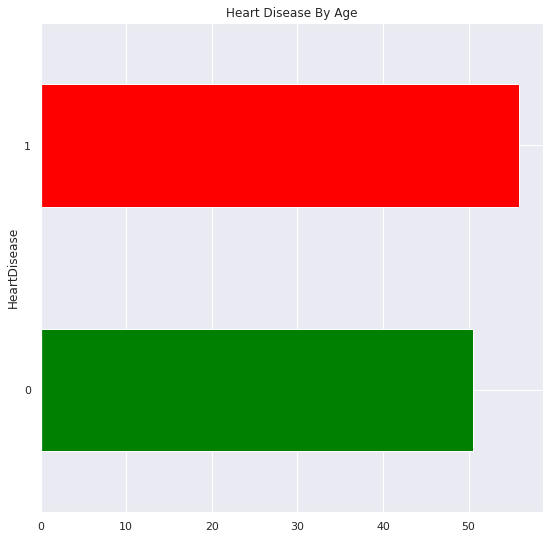

In [ ]:
hd_age=df.groupby('HeartDisease')['Age'].mean()
print(hd_age)
hd_age.plot(kind='barh',color=['green','red'])
plt.title('Heart Disease By Age')
sns.set_style('darkgrid')


In [ ]:
hd_sex=df.groupby('HeartDisease')['Sex'].value_counts().unstack()
hd_sex

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


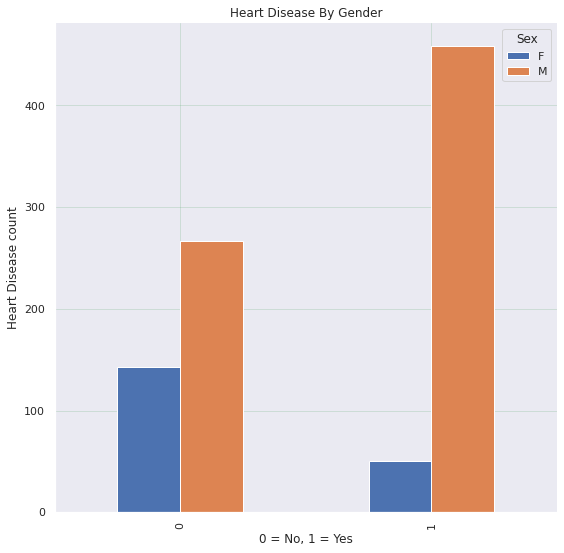

In [ ]:
hd_sex.plot(kind='bar')
plt.title('Heart Disease By Gender')
plt.ylabel('Heart Disease count')
plt.xlabel('0 = No, 1 = Yes')
plt.grid(color='g',alpha=0.2)
sns.set_theme(style="white")
sns.despine()

In [ ]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Text(0.5, 1.0, 'Chest Pain Type count By Gender')

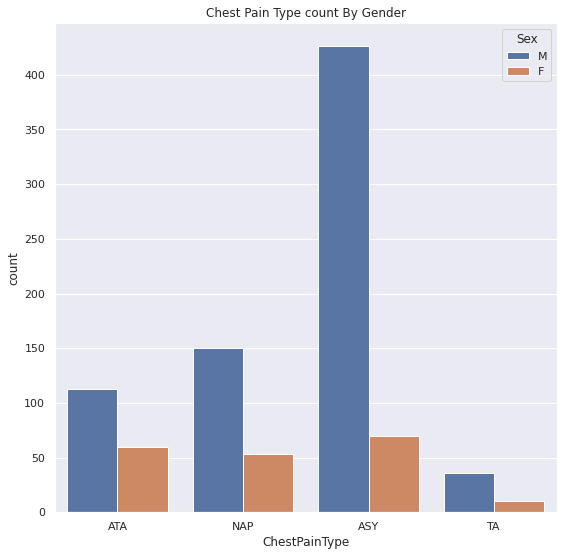

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x='ChestPainType', hue='Sex', data=df)
plt.title('Chest Pain Type count By Gender')


In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 70, 100], labels = ['<30','30-40','40-50','50-60','60-70','70+'])

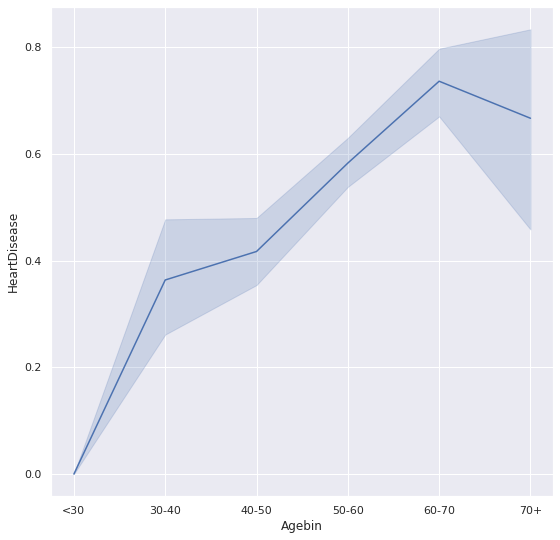

In [ ]:
sns.lineplot(x='Agebin', y='HeartDisease', data=df)
plt.rcParams['figure.figsize']=(15,5)

In [ ]:
df['Restbpbin'] = pd.cut(df['RestingBP'], bins = [75, 100, 125, 150, 175, 200], labels = ['75-100','100-125','125-150','150-175','175-200'])

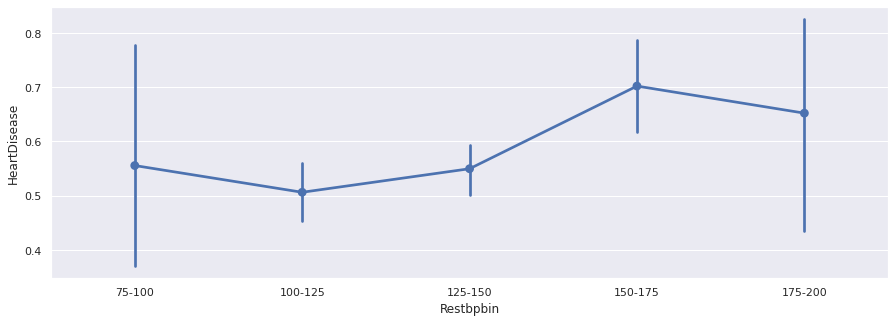

In [ ]:
sns.pointplot(x='Restbpbin', y='HeartDisease', data=df)
plt.rcParams['figure.figsize']=(15,5)

In [ ]:
df['Cholbin'] = pd.cut(df['Cholesterol'], bins = [0, 150, 200, 250, 300, 350, 400, 1000], labels = ['0-150','150-200','200-250','250-300','300-350','350-400','400+'])

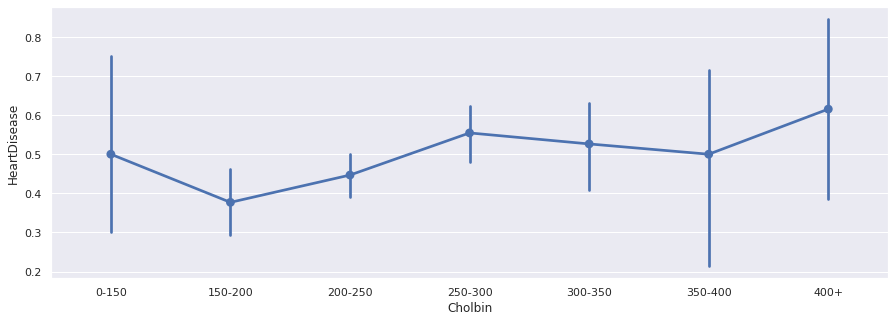

In [ ]:
sns.pointplot(x='Cholbin', y='HeartDisease', data=df)
plt.rcParams['figure.figsize']=(15,5)

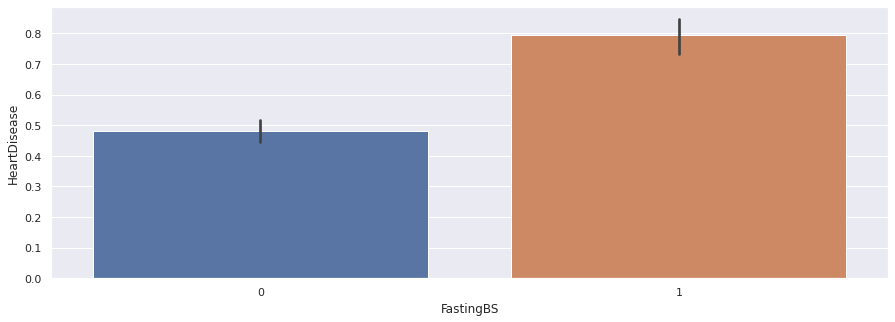

In [ ]:
sns.barplot(x=df.FastingBS,y=df.HeartDisease)

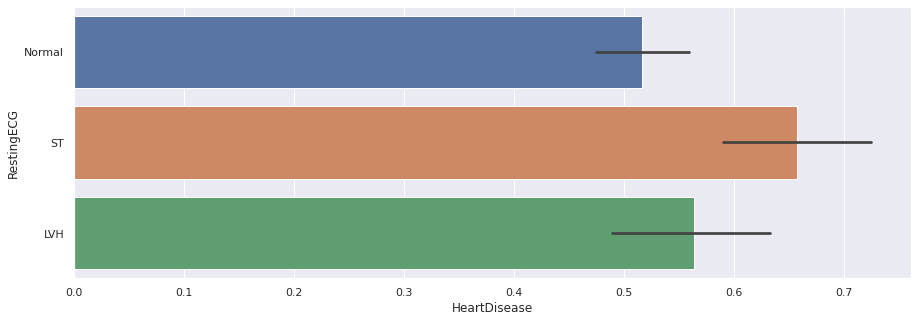

In [ ]:
sns.barplot(x=df.HeartDisease,y=df.RestingECG)

In [ ]:
df['Maxhrbin'] = pd.cut(df['MaxHR'], bins = [0, 80, 100, 120, 140, 160, 180, 200,1000], labels = ['0-80','80-100','100-120','120-140','140-160','160-180','180-200','200+'])

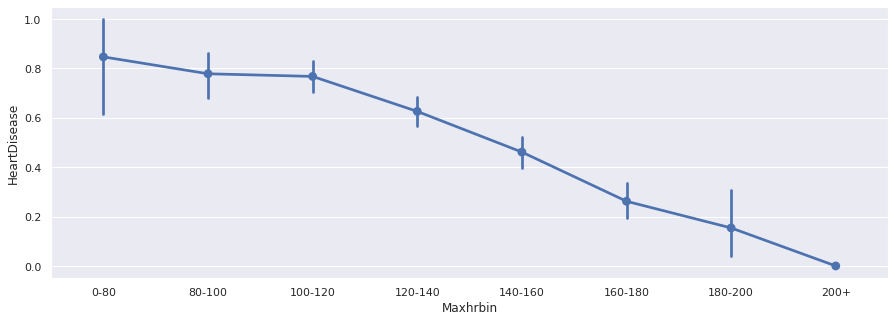

In [ ]:
sns.pointplot(x='Maxhrbin', y='HeartDisease', data=df)
plt.rcParams['figure.figsize']=(15,5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


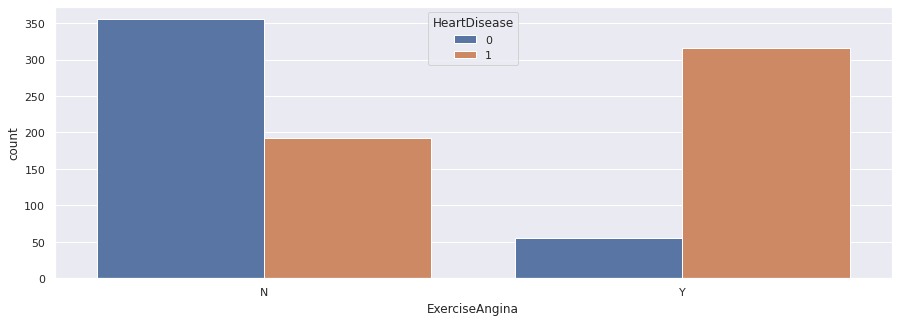

In [ ]:
sns.countplot(df.ExerciseAngina,hue=df.HeartDisease)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


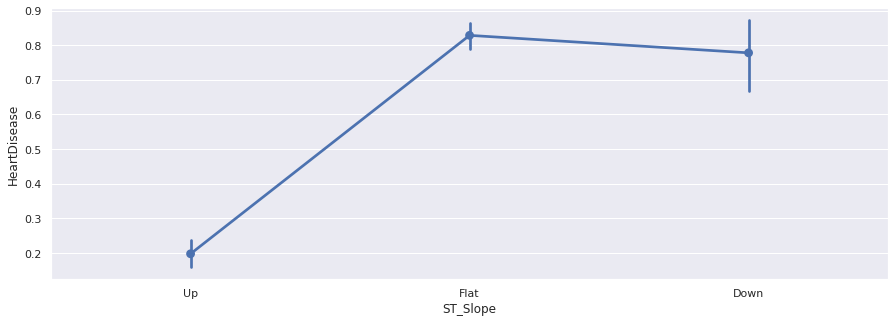

In [ ]:
sns.pointplot(df.ST_Slope,df.HeartDisease,)

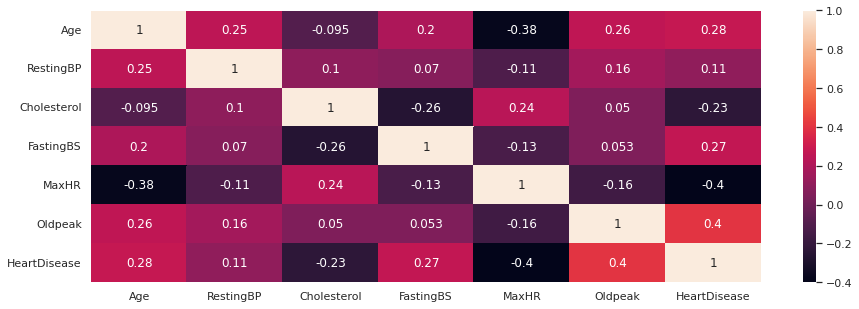

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df = pd.get_dummies(df, columns=['ChestPainType','RestingECG','ST_Slope'],drop_first=True)
df['Sex'] = np.where(df['Sex']=='M', 1, 0)
df['ExerciseAngina'] = np.where(df['ExerciseAngina']=='Y', 1, 0)

In [ ]:
df.drop(columns=['Agebin','Cholbin','Restbpbin','Maxhrbin'],inplace=True)

In [ ]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,1,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0
916,57,0,130,236,0,174,0,0.0,1,1,0,0,0,0,1,0


In [ ]:
X = df.drop(['HeartDisease'], axis=1)
y = df.HeartDisease

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.15, random_state = 0)

In [ ]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
740,54,0,160,201,0,163,0,0.0,0,1,0,1,0,0,1
5,39,1,120,339,0,170,0,0.0,0,1,0,1,0,0,1
294,32,1,95,0,1,127,0,0.7,0,0,1,1,0,0,1
471,68,1,138,0,0,130,1,3.0,0,0,0,1,0,1,0
666,52,1,128,205,1,184,0,0.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,1,110,239,0,126,1,2.8,0,0,0,1,0,1,0
192,48,1,130,245,0,160,0,0.0,1,0,0,1,0,0,1
629,57,0,128,303,0,159,0,0.0,0,0,0,0,0,0,1
559,64,1,134,273,0,102,1,4.0,0,0,0,1,0,0,0


In [ ]:
X_train.shape, X_test.shape

((780, 15), (138, 15))

In [ ]:
# define function for confusion matrix
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [ ]:
# define function for metrics score
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
   
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          plt.rcParams['figure.figsize'] = (7, 7)
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [ ]:
# define function to append metrics score in list
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of model to list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# **Decision Tree**

In [ ]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.797101,1.0,0.8375,1.0,0.817073,1.0,0.82716


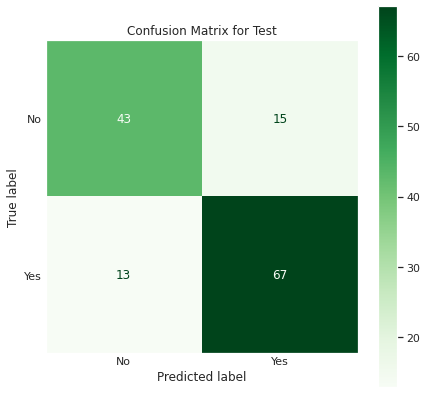

In [ ]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

# **Tuned DT**

In [ ]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj=grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=7, min_samples_leaf=2, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.798718,0.811594,0.978972,0.9875,0.738977,0.759615,0.842211,0.858696


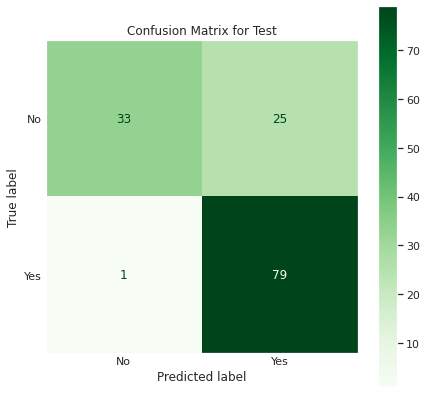

In [ ]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

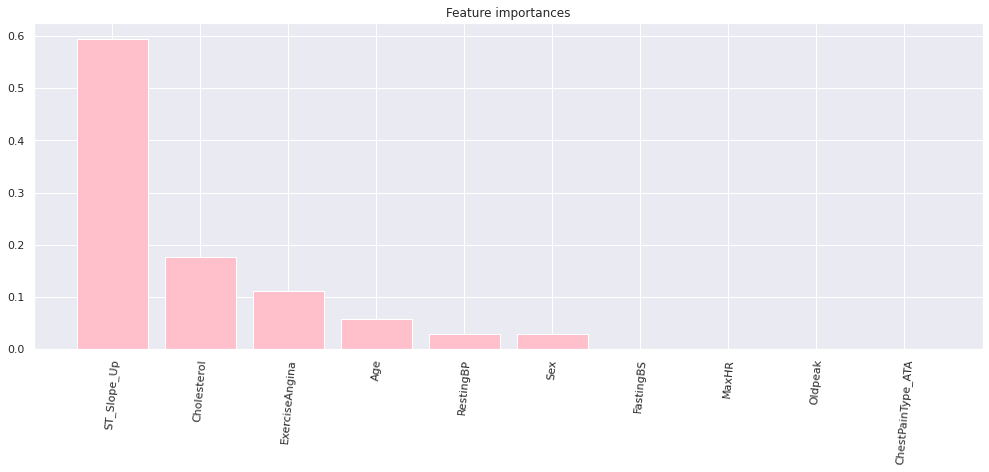

In [ ]:
# Feature importance
feature_importances_dt = pd.DataFrame(dtree_tuned.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_dt']).sort_values('importance_dt',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_dt.index, feature_importances_dt['importance_dt'],
        color="pink",  align="center")
plt.xticks(feature_importances_dt.index, rotation = 85)
plt.show()

# **Random Forest**

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator=rf_estimator.fit(X_train,y_train)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.998718,0.862319,0.997664,0.9125,1.0,0.858824,0.99883,0.884848


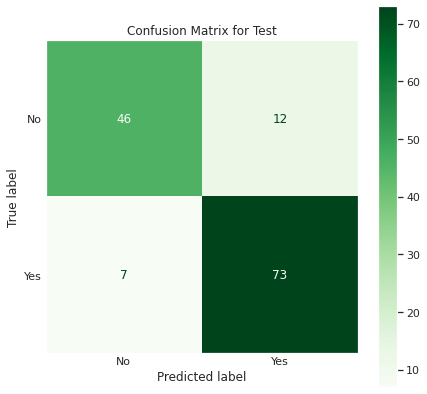

In [ ]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

# **Tuned RF**

In [ ]:
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# parameters = {"n_estimators": [50,80,150], 
#               "max_depth": [1,2,3], 
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj=grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       max_samples=0.3, min_samples_leaf=8, n_estimators=150,
                       random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.832051,0.826087,0.976636,0.9625,0.77551,0.785714,0.864529,0.865169


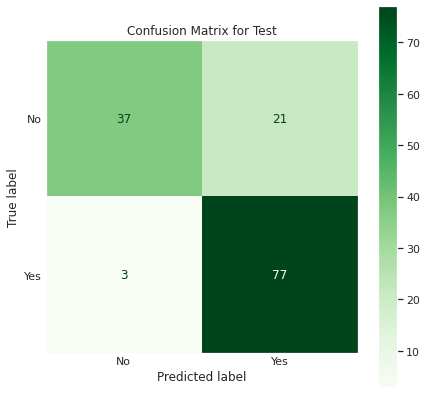

In [ ]:
score_tune_rf=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rf) 

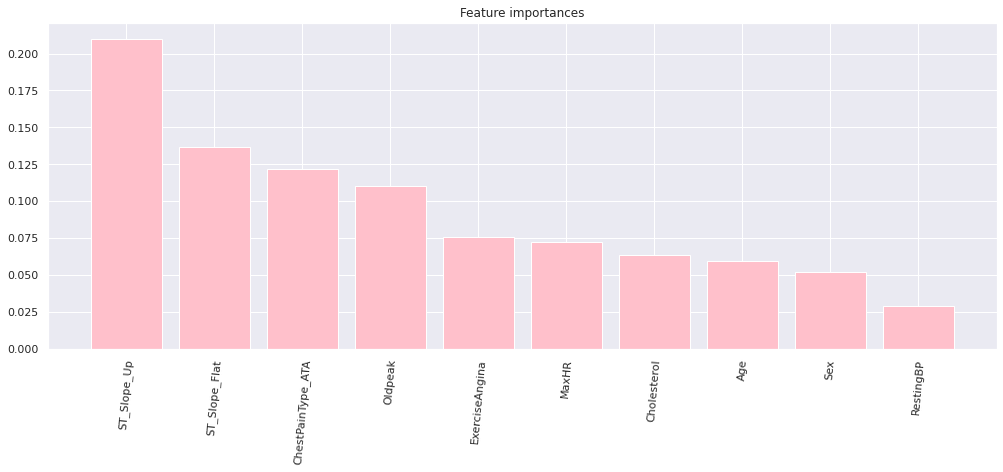

In [ ]:
# Feature importance
feature_importances_rf = pd.DataFrame(rf_tuned.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
plt.show()

# **Gradient Boost**

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc=gbc.fit(X_train,y_train)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.942308,0.891304,0.957944,0.9375,0.938215,0.882353,0.947977,0.909091


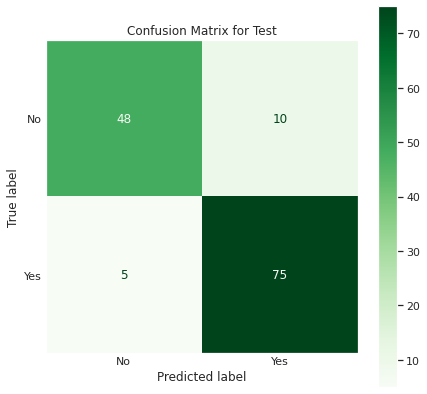

In [ ]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)


# **Tuned GB**

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=150, random_state=1,
                           subsample=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.928205,0.869565,0.948598,0.925,0.922727,0.860465,0.935484,0.891566


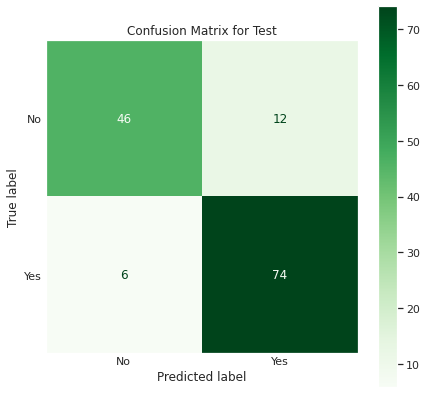

In [ ]:
gbc_tuned_score=get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test)
add_score_model(gbc_tuned_score)

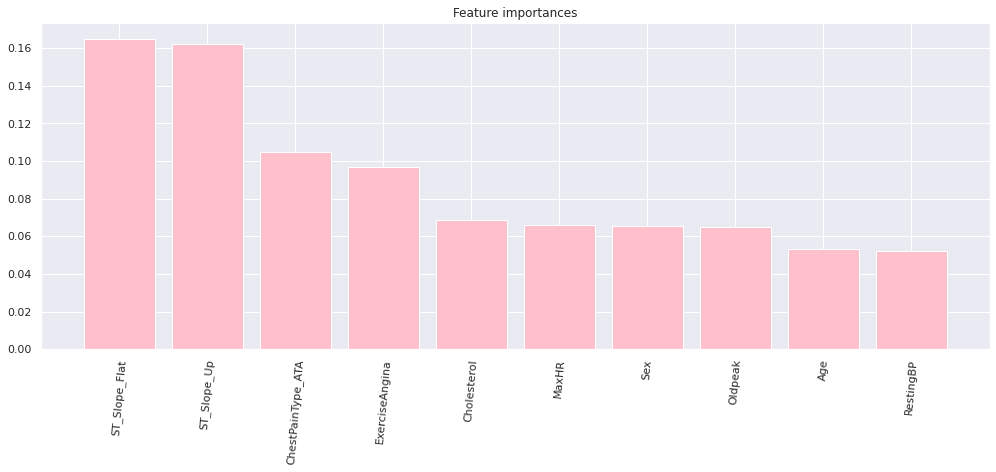

In [ ]:
# Feature importance
feature_importances_gbc = pd.DataFrame(gbc_tuned.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_gbc']).sort_values('importance_gbc',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_gbc.index, feature_importances_gbc['importance_gbc'],
        color="pink",  align="center")
plt.xticks(feature_importances_gbc.index, rotation = 85)
plt.show()

# **XGBoost**

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.933333,0.862319,0.948598,0.9125,0.931193,0.858824,0.939815,0.884848


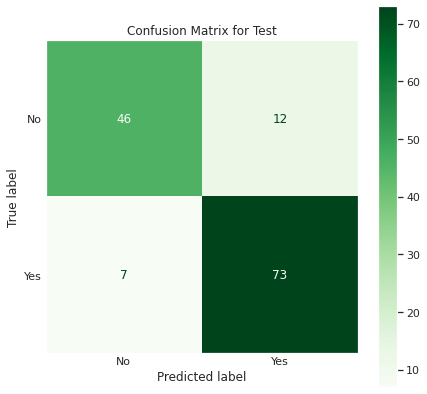

In [ ]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

# **Tuned XGBoost**

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj=grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.5, eval_metric='logloss', learning_rate=0.01,
              n_estimators=70, random_state=1, scale_pos_weight=5)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.824359,0.797101,0.974299,0.975,0.767956,0.75,0.858908,0.847826


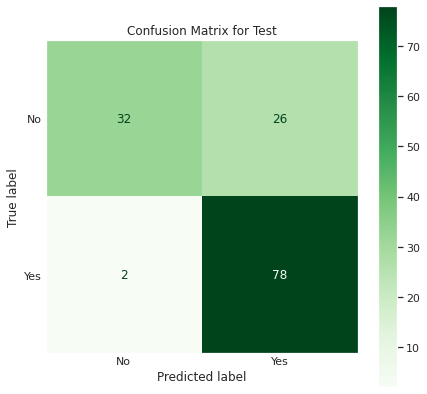

In [ ]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)

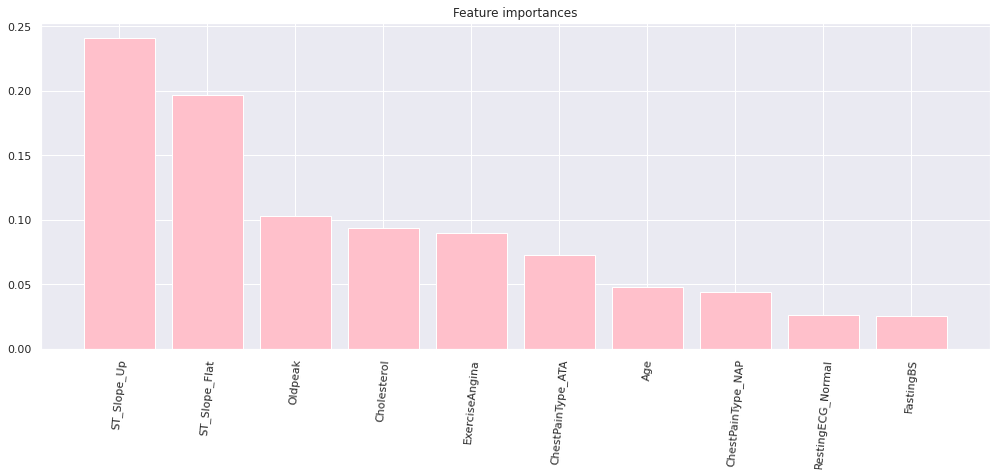

In [ ]:
# Feature importance
feature_importances_xgb = pd.DataFrame(xgb_tuned.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="pink",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
plt.show()

# **Adaboost**

In [ ]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.89359,0.855072,0.913551,0.9,0.894737,0.857143,0.904046,0.878049


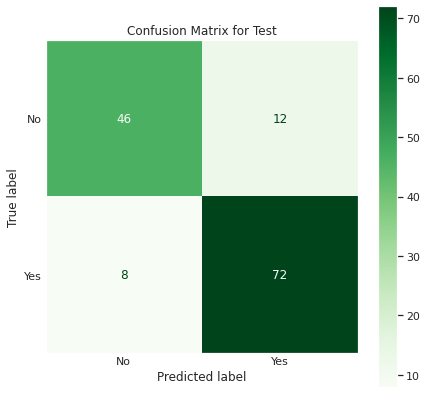

In [ ]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

# **Tuned Adaboost**

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj=grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=10, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.873077,0.833333,0.913551,0.8875,0.863135,0.835294,0.887628,0.860606


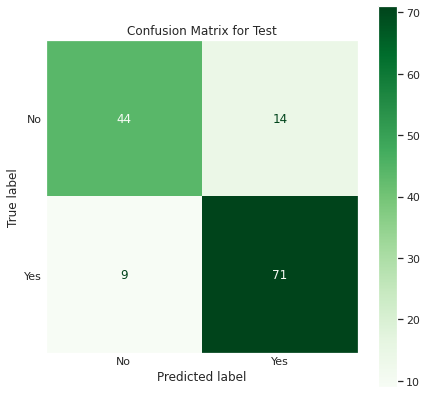

In [ ]:
abc_tuned_score=get_metrics_score(abc_tuned,X_train,X_test,y_train,y_test)
add_score_model(abc_tuned_score)

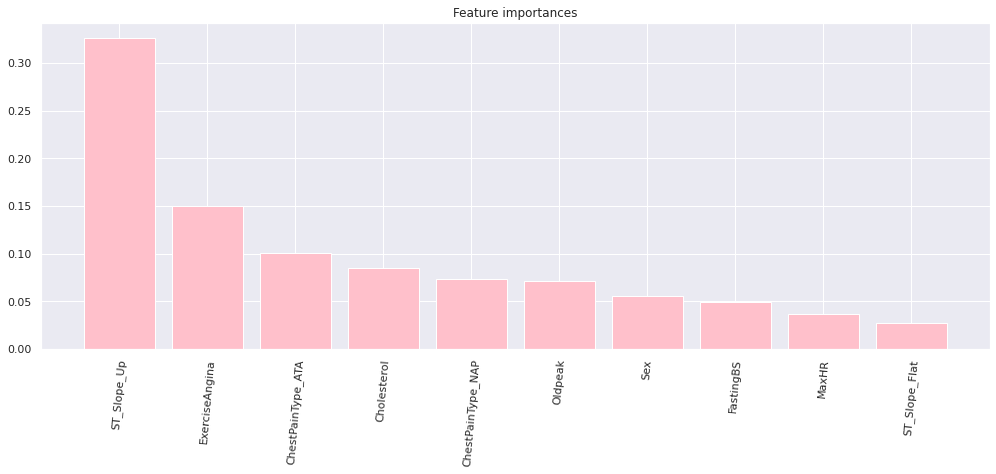

In [ ]:
# Feature importance
feature_importances_abc = pd.DataFrame(abc_tuned.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_abc']).sort_values('importance_abc',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_abc.index, feature_importances_abc['importance_abc'],
        color="pink",  align="center")
plt.xticks(feature_importances_abc.index, rotation = 85)
plt.show()

In [ ]:
# dataframe to compare all the models
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree',
                                          'Random Forest','Tuned Random Forest',
                                          'Gradient Boost','Tuned Gradient Boost',
                                          'XGboost','Tuned XGboost',
                                          'AdaBoost','Tuned AdaBoost',],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,'Test_F1':f1_test}) 
                                                       
                                
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,Gradient Boost,0.942308,0.891304,0.957944,0.9375,0.938215,0.882353,0.947977,0.909091
5,Tuned Gradient Boost,0.928205,0.869565,0.948598,0.9250,0.922727,0.860465,0.935484,0.891566
2,Random Forest,0.998718,0.862319,0.997664,0.9125,1.000000,0.858824,0.998830,0.884848
6,XGboost,0.933333,0.862319,0.948598,0.9125,0.931193,0.858824,0.939815,0.884848
8,AdaBoost,0.893590,0.855072,0.913551,0.9000,0.894737,0.857143,0.904046,0.878049
3,Tuned Random Forest,0.832051,0.826087,0.976636,0.9625,0.775510,0.785714,0.864529,0.865169
9,Tuned AdaBoost,0.873077,0.833333,0.913551,0.8875,0.863135,0.835294,0.887628,0.860606
1,Tuned Decision Tree,0.798718,0.811594,0.978972,0.9875,0.738977,0.759615,0.842211,0.858696
7,Tuned XGboost,0.824359,0.797101,0.974299,0.9750,0.767956,0.750000,0.858908,0.847826
0,Decision Tree,1.000000,0.797101,1.000000,0.8375,1.000000,0.817073,1.000000,0.827160


In [ ]:
# dump tuned XGBoost model
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(gbc,open('Gradient_boost.pkl','wb'))